In [1]:
from custom_benchmark_problems.diamon_problem.core.evaluation import BMP
from custom_benchmark_problems.diamon_problem.data_structures.tree import Tree
import numpy as np


dimension = 1
tree = Tree(dim_space=dimension)
tree.from_json("simplest_tree.json")
bmp = BMP(sequence_info=tree.to_sequence(), dim_space=dimension, rotate=False)

In [16]:
print(bmp.evaluate(np.array([1,0.6],dtype="float64")))

EvaluationResult(t=1.0, y=-0.4, node_id=0, diagonal_length=array([1.]), unrotated_value=[1.0, -0.4])


In [3]:
bmp.compute_coordinates([])

***************************
[]
[0.]
***************************


array([0.])

In [4]:
def f_3_l2(t,x):
    return -(t **2 + x ** 2)

def f_3_l1(t,x):
    return -(abs(t) + abs(x))


In [5]:
t_s = []
f_t_s = []
x_s = []
f_x_s = []
f_3_t_s = []
f_3_x_s = []
f_3_l1_t_s = []
f_3_l1_x_s = []
for t in [x/100 for x in range(201)]:
    t_s.append(t)
    print(bmp.evaluate(np.array([t,0],dtype="float64")))
    f_t_s.append(bmp.evaluate(np.array([t,0],dtype="float64")).y)
    f_3_t_s.append(f_3_l2(t,0))
    f_3_l1_t_s.append(f_3_l1(t,0))
for x_0 in [x/100 for x in range(201)]:
     x_s.append(x_0)
     f_x_s.append(bmp.evaluate(np.array([1,x_0],dtype="float64")).y)
     f_3_x_s.append(f_3_l2(1,x_0))
     f_3_l1_x_s.append(f_3_l1(1,x_0))

EvaluationResult(t=0.0, y=0.0, node_id=0, diagonal_length=0, unrotated_value=[0.0, 0.0])
***************************
[]
[0.]
***************************
EvaluationResult(t=0.01, y=-0.01, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.01, -0.01])
***************************
[]
[0.]
***************************
***************************
[]
[0.]
***************************
EvaluationResult(t=0.02, y=-0.02, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.02, -0.02])
***************************
[]
[0.]
***************************
***************************
[]
[0.]
***************************
EvaluationResult(t=0.03, y=-0.03, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.03, -0.03])
***************************
[]
[0.]
***************************
***************************
[]
[0.]
***************************
EvaluationResult(t=0.04, y=-0.04, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.04, -0.04])
***************************
[]
[0.]
*******

In [27]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

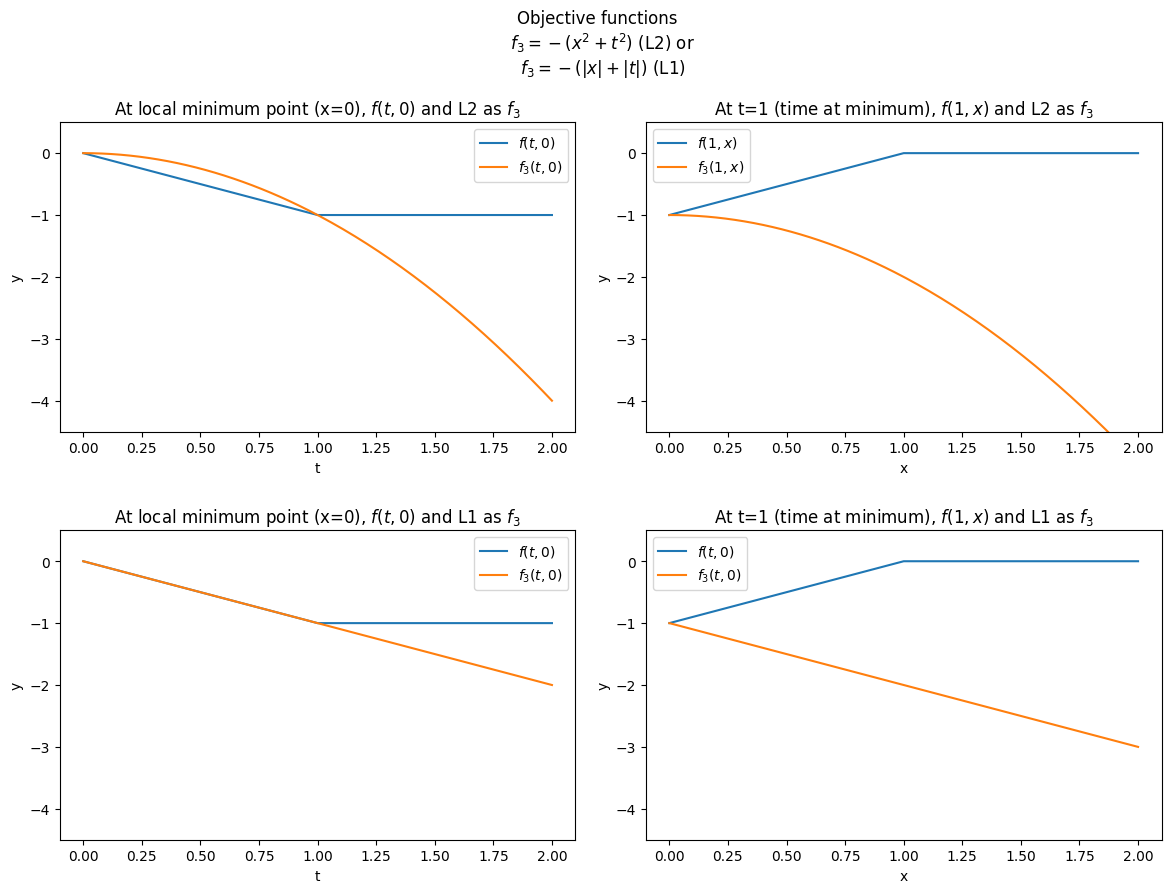

In [198]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Objective functions \n ${f_3=-(x^2+t^2)}$ (L2) or \n ${f_3=-(|x|+|t|)}$ (L1)")
fig.tight_layout(pad=2,h_pad=5)

axs[0,0].set_title("At local minimum point (x=0), ${f(t,0)}$ and L2 as ${f_3}$")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel("y")
axs[0,0].plot(t_s,f_t_s, label="${f(t,0)}$")
axs[0,0].plot(t_s,f_3_t_s, label="${f_3(t,0)}$")
axs[0,0].set_ylim([-4.5, 0.5])
axs[0,0].set_xlim([-0.1, 2.1])
axs[0,0].legend()


axs[0,1].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L2 as ${f_3}$")
axs[0,1].set_xlabel("x")
axs[0,1].set_ylabel("y")
axs[0,1].plot(x_s,f_x_s, label="${f(1,x)}$")
axs[0,1].plot(x_s,f_3_x_s, label="${f_3(1,x)}$")
axs[0,1].set_ylim([-4.5, 0.5])
axs[0,1].set_xlim([-0.1, 2.1])
axs[0,1].legend()

axs[1,0].set_title("At local minimum point (x=0), ${f(t,0)}$ and L1 as ${f_3}$")
axs[1,0].set_xlabel("t")
axs[1,0].set_ylabel("y")
axs[1,0].plot(t_s,f_t_s, label="${f(t,0)}$")
axs[1,0].plot(t_s,f_3_l1_t_s, label="${f_3(t,0)}$")
axs[1,0].set_ylim([-4.5, 0.5])
axs[1,0].set_xlim([-0.1, 2.1])
axs[1,0].legend()

axs[1,1].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L1 as ${f_3}$")
axs[1,1].set_xlabel("x")
axs[1,1].set_ylabel("y")
axs[1,1].plot(x_s,f_x_s, label="${f(t,0)}$")
axs[1,1].plot(x_s,f_3_l1_x_s, label="${f_3(t,0)}$")
axs[1,1].set_ylim([-4.5, 0.5])
axs[1,1].set_xlim([-0.1, 2.1])
axs[1,1].legend()

In [180]:
x_s = [x/100 for x in range(0,201,1)]
t_s = x_s

f_1 = []
f_2 = []
f_3_l1_res = []
f_3_l2_res = []
ref = []


for x in x_s:
    for t in t_s:
        f_1.append(bmp.evaluate(np.array([t,x],dtype="float64")).y)
        f_2.append(t)
        ref.append(0)
        f_3_l1_res.append(f_3_l1(t,x))
        f_3_l2_res.append(f_3_l2(t,x))



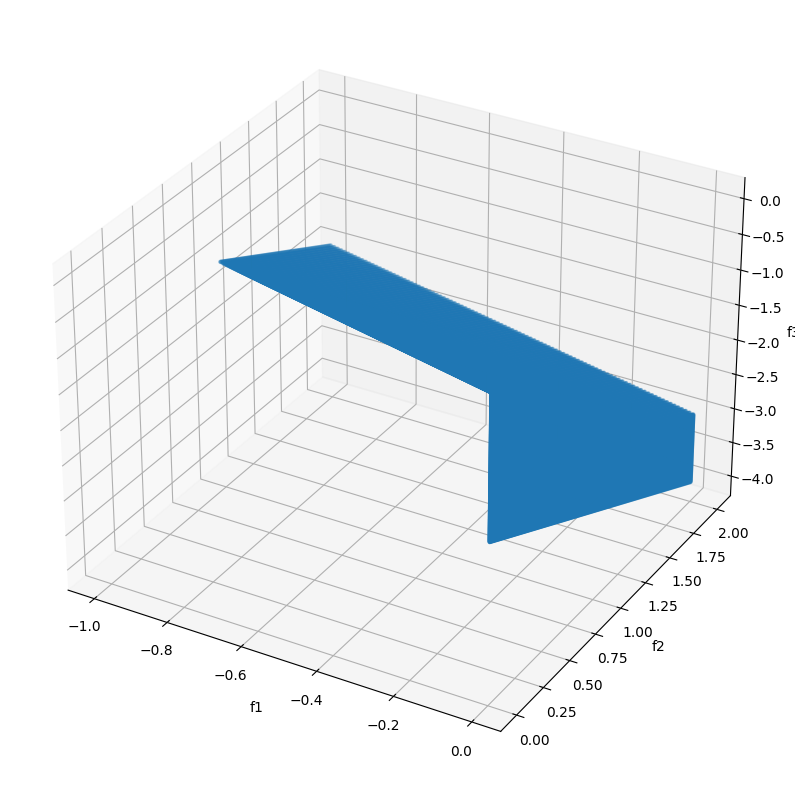

In [181]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(f_1, f_2, f_3_l1_res,marker='.')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.show()

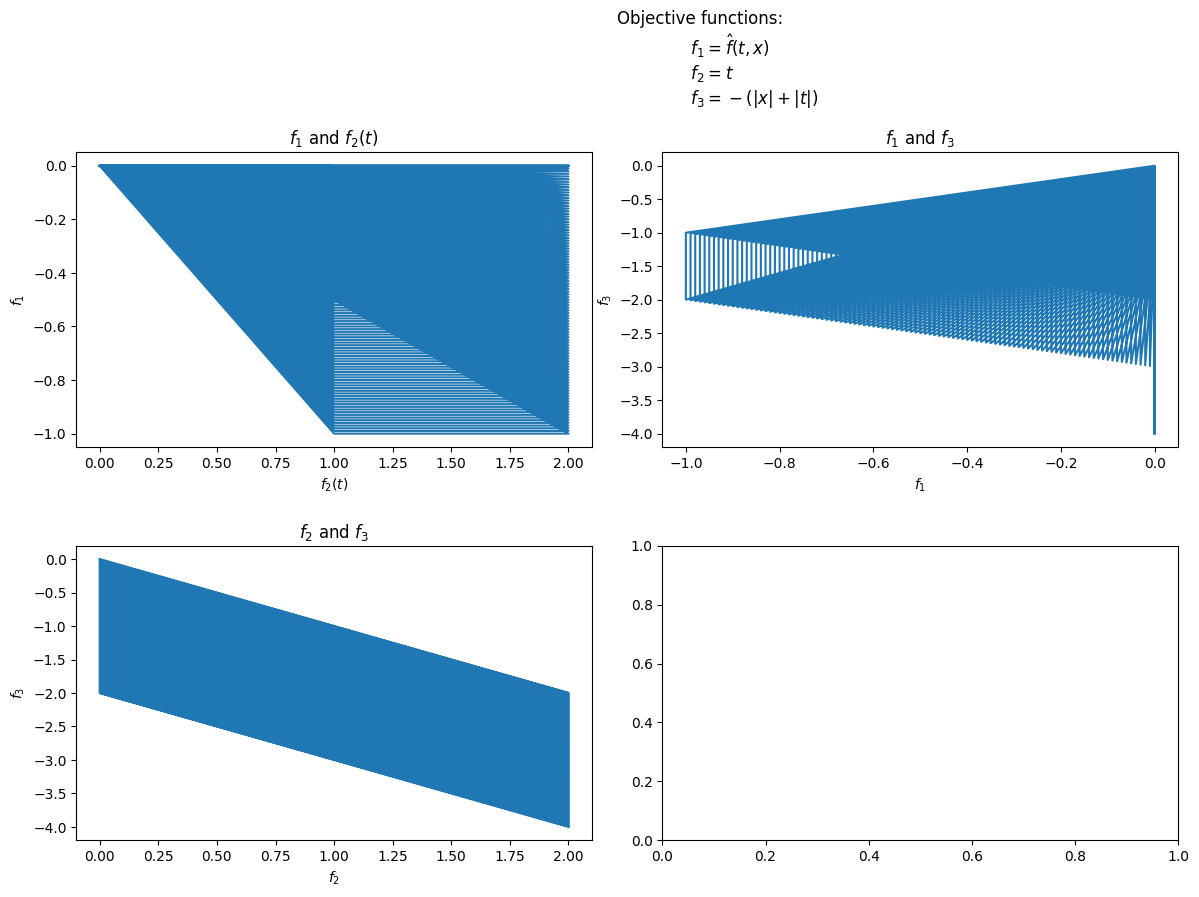

In [195]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

fig.suptitle("Objective functions: \n \
             ${f_1=\hat{f}(t,x)}$ \n \
             ${f_2=t}$ \n \
             ${f_3=-(|x|+|t|)}$ \
             ",horizontalalignment='left',verticalalignment='top')
fig.tight_layout(pad=2,h_pad=5)


axs[0,0].set_title("${f_1}$ and ${f_2} (t)$")
axs[0,0].set_xlabel("${f_2(t)}$")
axs[0,0].set_ylabel("${f_1}$")
axs[0,0].plot(f_2,f_1)
# axs[0,0].set_ylim([-4.5, 0.5])
# axs[0,0].set_xlim([-0.1, 2.1])
# axs[0,0].legend()

axs[0,1].set_title("${f_1}$ and ${f_3}$")
axs[0,1].set_xlabel("${f_1}$")
axs[0,1].set_ylabel("${f_3}$")
axs[0,1].plot(f_1,f_3_l1_res)
# axs[0,0].set_ylim([-4.5, 0.5])
# axs[0,0].set_xlim([-0.1, 2.1])
# axs[0,0].legend()

axs[1,0].set_title("${f_2}$ and ${f_3}$")
axs[1,0].set_xlabel("${f_2}$")
axs[1,0].set_ylabel("${f_3}$")
axs[1,0].plot(f_2,f_3_l1_res)
# axs[0,0].set_ylim([-4.5, 0.5])
# axs[0,0].set_xlim([-0.1, 2.1])
# axs[1,0].legend()


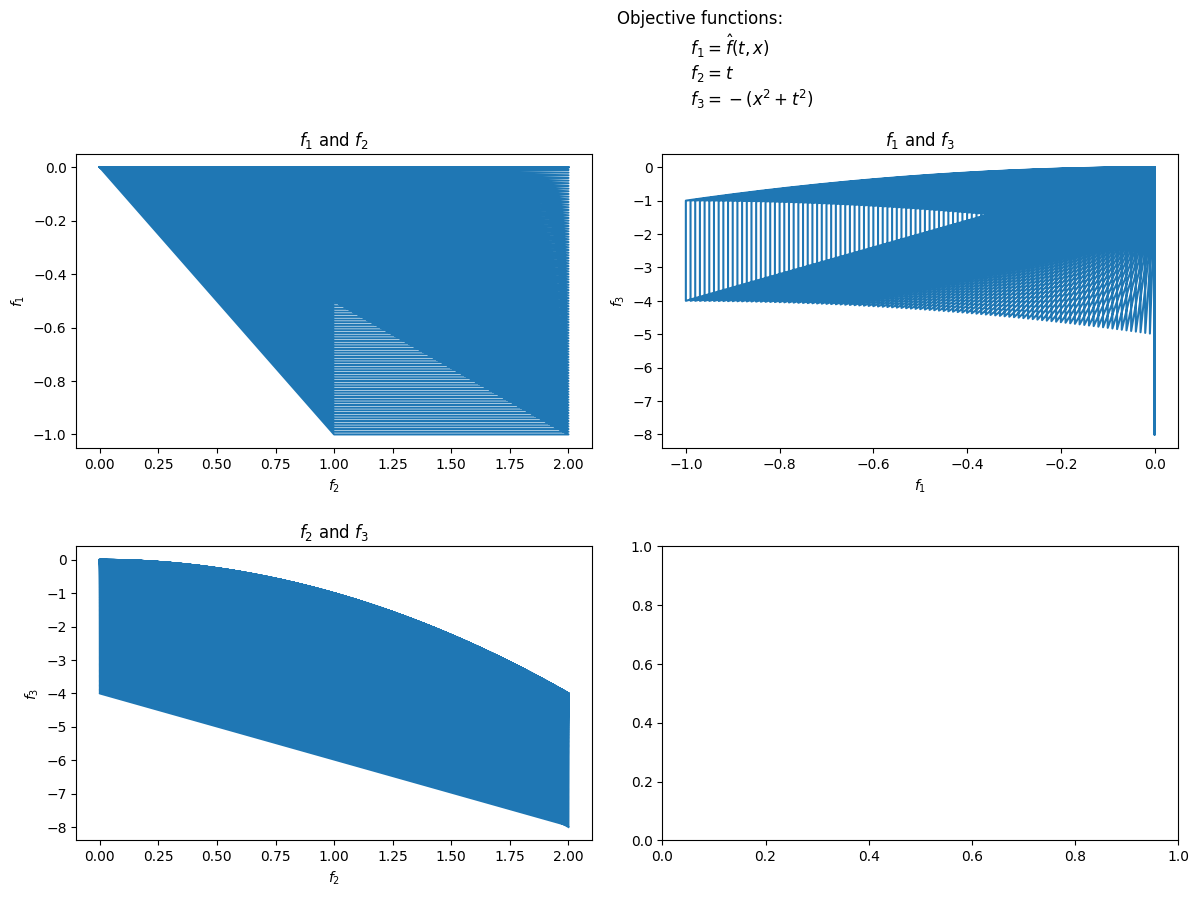

In [197]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

fig.suptitle("Objective functions: \n \
             ${f_1=\hat{f}(t,x)}$ \n \
             ${f_2=t}$ \n \
             ${f_3=-(x^2+t^2)}$ \
             ",horizontalalignment='left',verticalalignment='top')
fig.tight_layout(pad=2,h_pad=5)


axs[0,0].set_title("${f_1}$ and ${f_2}$")
axs[0,0].set_xlabel("${f_2}$")
axs[0,0].set_ylabel("${f_1}$")
axs[0,0].plot(f_2,f_1)
# axs[0,0].set_ylim([-4.5, 0.5])
# axs[0,0].set_xlim([-0.1, 2.1])
# axs[0,0].legend()

axs[0,1].set_title("${f_1}$ and ${f_3}$")
axs[0,1].set_xlabel("${f_1}$")
axs[0,1].set_ylabel("${f_3}$")
axs[0,1].plot(f_1,f_3_l2_res)
# axs[0,0].set_ylim([-4.5, 0.5])
# axs[0,0].set_xlim([-0.1, 2.1])
# axs[0,0].legend()

axs[1,0].set_title("${f_2}$ and ${f_3}$")
axs[1,0].set_xlabel("${f_2}$")
axs[1,0].set_ylabel("${f_3}$")
axs[1,0].plot(f_2,f_3_l2_res)
# axs[0,0].set_ylim([-4.5, 0.5])
# axs[0,0].set_xlim([-0.1, 2.1])
# axs[1,0].legend()